In [1]:
from finance_data_scraper import 

#Setup the environment
import sys
sys.path.append("./src/News")
sys.path.append("./src/Stocks")

from src.News.mongo_client import MongoDBClient
from src.Stocks.QuestClient import QuestClient
from src.Stocks.TickerRepository import TickerRepository
from src.Stocks.model.Ticker import Ticker

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mongoClient = MongoDBClient()
questClient = QuestClient()
tickerRepository = TickerRepository(questClient)


In [24]:
#Define the ticker
ticker = Ticker("AAPL","NASDAQ")
#Get data from QuestDB
df_daily = tickerRepository.get_values(tickers=ticker,interval="1d",values=["close","volume"])
df_minutly = tickerRepository.get_values(tickers=ticker,interval="5m",values=["adj_close","open","volume"])

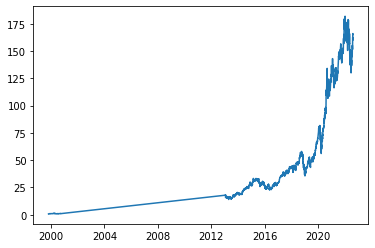

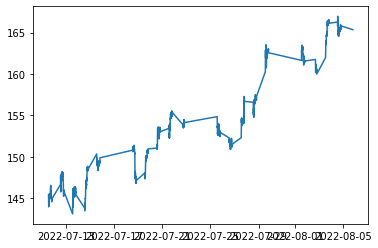

In [27]:
plt.plot(df_daily['close'])
plt.show()

plt.plot(df_minutly['adj_close'].drop(pd.Timestamp("1970-01-01")))

In [5]:
for article in mongoClient.get_articles(["GOOGL"]):
    print(f"{article['date']}: {article['url']}")

2022-08-07 16:39:00: https://finance.yahoo.com/news/twitch-gambling-boom-luring-gamers-223936570.html
2022-08-07 16:12:00: https://finance.yahoo.com/news/nigeria-asks-google-block-banned-221204880.html
2022-08-07 16:08:00: https://finance.yahoo.com/news/nigeria-asks-google-block-banned-220805165.html
2022-08-07 16:00:00: https://finance.yahoo.com/news/pinterest-jumps-sales-user-numbers-202626042.html
2022-08-07 15:50:00: https://www.barrons.com/articles/usd-dollar-stock-market-51659386416?siteid=yhoof2
2022-08-07 15:46:00: https://finance.yahoo.com/news/match-plunges-sales-forecast-falls-205214902.html
2022-08-07 15:34:00: https://www.barrons.com/articles/pinterest-stock-earnings-51659387767?siteid=yhoof2
2022-08-07 15:20:00: https://www.barrons.com/articles/apple-stock-advertising-business-51659734299?siteid=yhoof2
2022-08-07 15:07:00: https://finance.yahoo.com/video/tech-antitrust-bill-vote-postponed-210749467.html
2022-08-07 15:05:00: https://finance.yahoo.com/news/google-apple-back

In [18]:
for sentiment in mongoClient.get_sentiments(["GOOGL"]):
    print(f"{sentiment['date']}: {sentiment['sentiment']}")

2022-08-07 16:00:00: {'class': -1, 'probabilities': [0.5694329738616943, 0.38866016268730164, 0.04190690815448761]}
2022-08-07 15:34:00: {'class': 0, 'probabilities': [0.14826710522174835, 0.8259298205375671, 0.025803059339523315]}
2022-08-07 15:20:00: {'class': 1, 'probabilities': [0.03603768348693848, 0.039960719645023346, 0.9240016341209412]}
2022-08-07 15:05:00: {'class': 1, 'probabilities': [0.09452497959136963, 0.046566110104322433, 0.8589088916778564]}
2022-08-07 14:47:00: {'class': 1, 'probabilities': [0.2547110915184021, 0.36824774742126465, 0.37704116106033325]}
2022-08-07 14:06:00: {'class': 0, 'probabilities': [0.05236149951815605, 0.9084829092025757, 0.039155613631010056]}
2022-08-07 13:56:00: {'class': 1, 'probabilities': [0.07213989645242691, 0.05319826304912567, 0.874661922454834]}
2022-08-07 13:42:00: {'class': 0, 'probabilities': [0.02530704252421856, 0.7884229421615601, 0.18626999855041504]}
2022-08-07 13:28:00: {'class': 1, 'probabilities': [0.11936180293560028, 0.3